## Step 1: Reading and Understanding the Given Dataset

In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [6]:
# Read the given dataset from csv file
df = pd.read_csv('day.csv')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# checking the shape of dataframe
df.shape

(730, 16)

In [9]:
# describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# get details about various columns present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# Means that are no null values in the dataset across various columns

In [13]:
# renaming columns (such as 'yr', 'hum') for better readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [14]:
# Copying the dataframe into new
df_copy = df.copy()

In [15]:
# checking the shape of new dataframe
df_copy.shape

(730, 16)

In [16]:
# dropping the duplicates
df_copy.drop_duplicates(inplace=True)

In [17]:
# re-verifying the shape of new dataframe
df_copy.shape

(730, 16)

#### As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [18]:
df

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [19]:
# dropping the unwanted columns
# casual and registered seems to be the breakup by category for cnt column.
# dteday has date which can be compensated by year and month column,
# instant has only index for the row,
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [20]:
# Encoding/mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [21]:
# Encoding/mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [22]:
# Encoding/mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [23]:
# Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [24]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# check the column info of the dataset after the transformations and cleanups
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data and drawing insights through Categorical Analysis

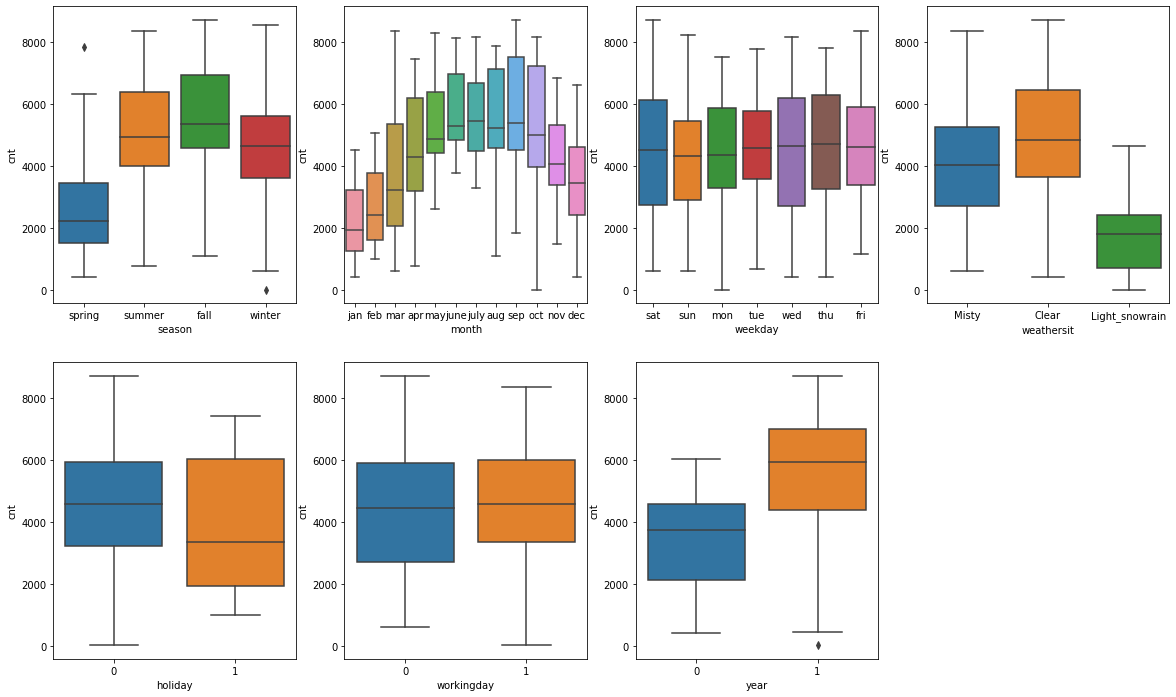

In [26]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [27]:
# function to create barplot related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

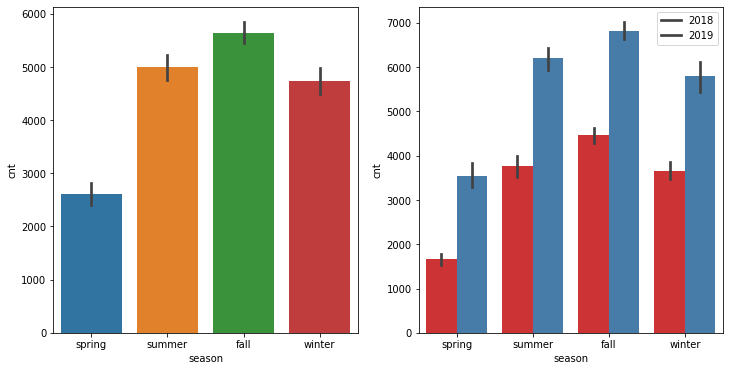

In [28]:
# plotting visualization for season column
plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has seen an year or year increase from 2018 to 2019.

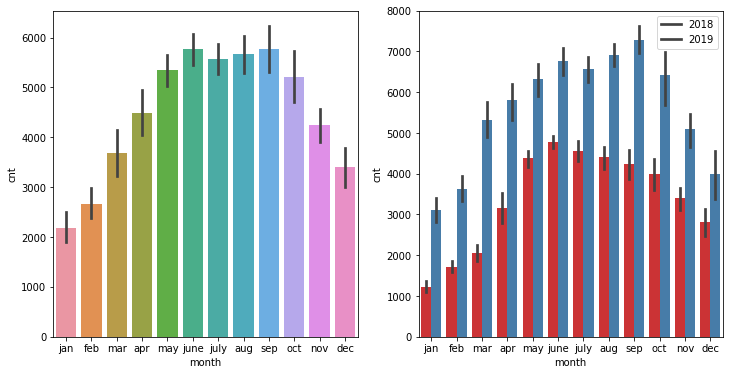

In [29]:
# plotting visualization for month column
plot_cat_columns('month')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

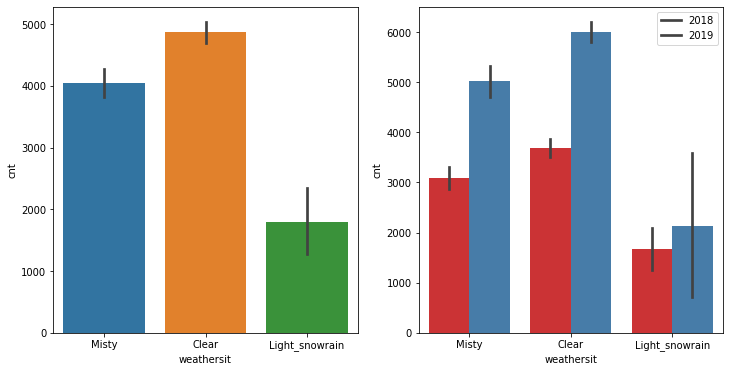

In [30]:
# plotting visualization for weathersit column
plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

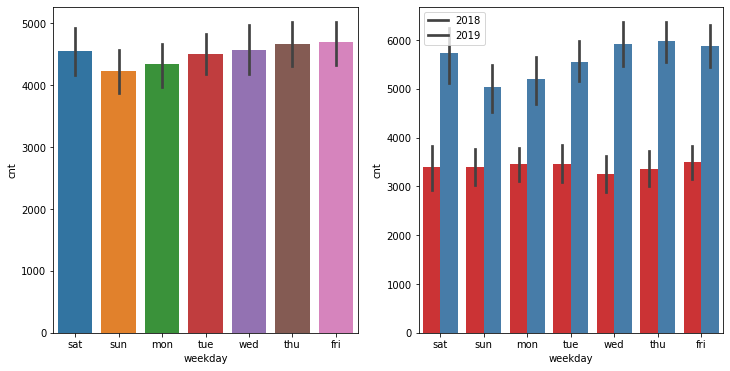

In [31]:
# plotting visualization for weekday column
plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

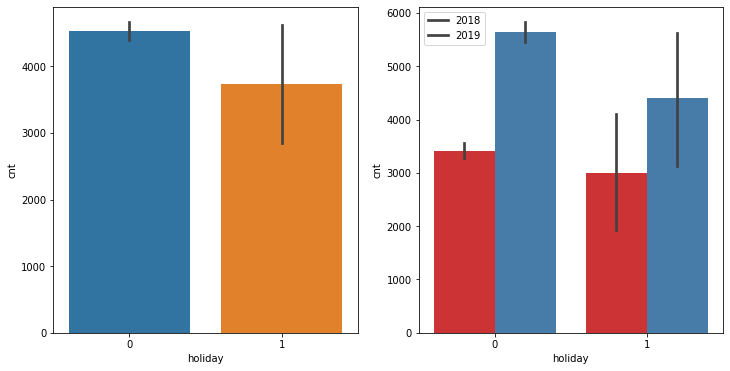

In [32]:
# plotting visualization for holiday column
plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

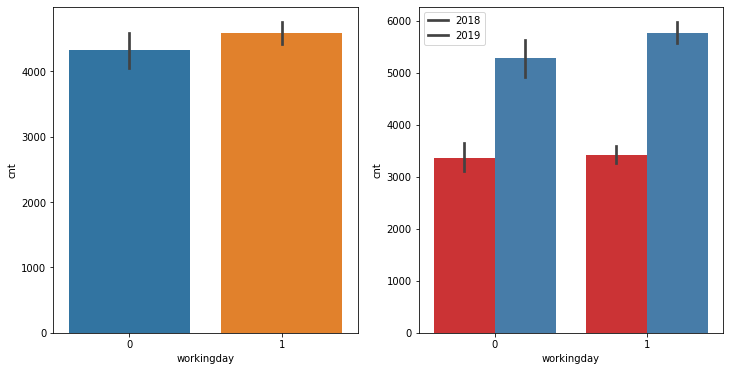

In [33]:
# plotting visualization for workingday column
plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

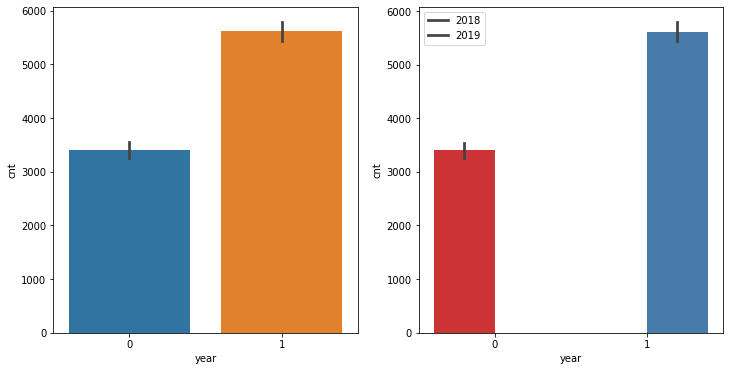

In [34]:
# plotting visualization for year column
plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

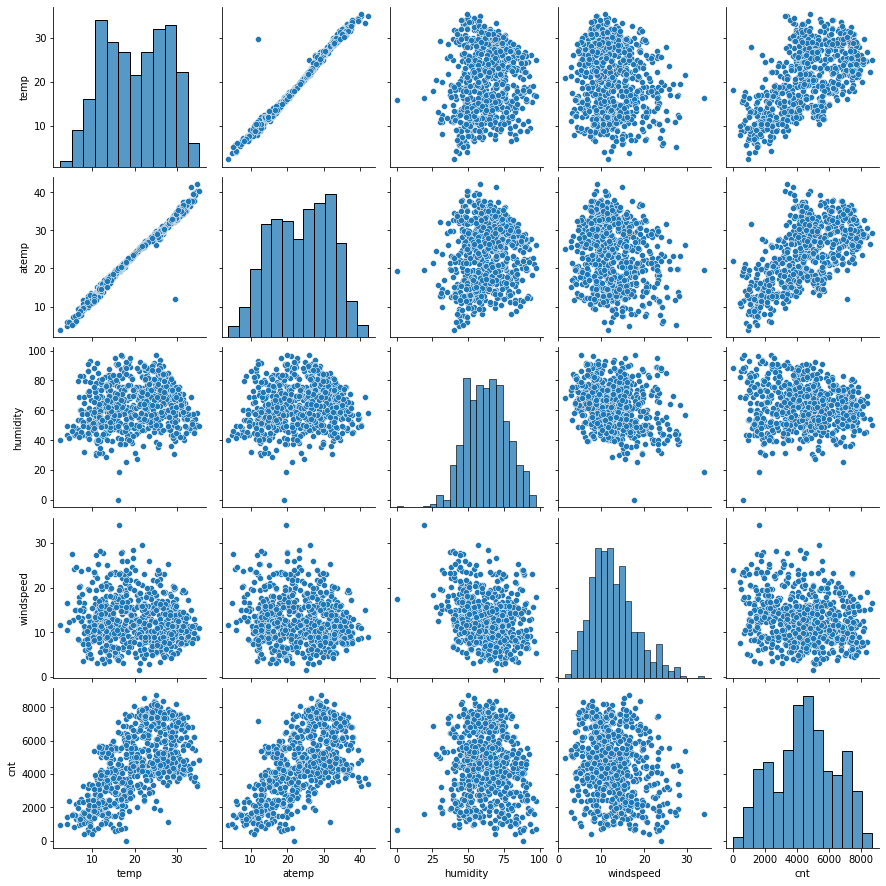

In [35]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

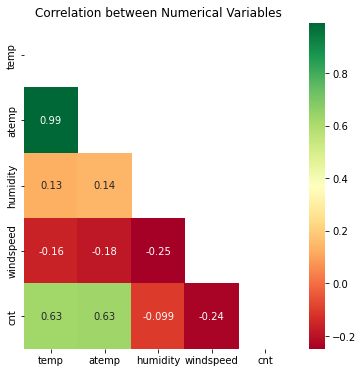

In [36]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Preparing Data for model creation

In [37]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [ ]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Merging  the dataframe, with the dummy variable dataset. 
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [39]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [41]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [42]:
# check the head of new dataframe
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [43]:
# check the shape of new dataframe
df_new.shape

(730, 30)

In [45]:
# check the column info of new dataframe 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Test datasets

In [52]:
# splitting the dataframe into Train and Test
np.random.seed(10)
df_train, df_test = train_test_split(df_new, train_size = 0.8, random_state = 9)

In [53]:
# check the shape of training datatset
df_train.shape

(584, 30)

In [54]:
# check the shape of testing datatset
df_test.shape

(146, 30)

In [55]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [56]:
# verifying the head of dataset before scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,...,0,0,0,1,0,0,0,0,0,1
495,1,0,1,21.866653,26.04165,36.0417,15.874779,7030,0,0,...,0,0,0,0,0,0,0,0,1,0
668,1,0,1,14.657500,18.05500,66.6667,11.166689,5566,0,0,...,0,0,0,0,1,0,1,0,0,1
308,0,0,0,13.393347,16.19270,51.9167,12.667154,3926,0,0,...,1,0,0,0,0,0,0,0,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [58]:
# verifying the head after appying scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
674,1,0,1,0.276252,0.265805,0.483271,0.311545,0.651634,0,0,...,0,0,0,1,0,0,0,0,0,1
495,1,0,1,0.590880,0.579874,0.219862,0.442296,0.806259,0,0,...,0,0,0,0,0,0,0,0,1,0
668,1,0,1,0.371783,0.370203,0.610197,0.297431,0.637828,0,0,...,0,0,0,0,1,0,1,0,0,1
308,0,0,0,0.333364,0.321313,0.422199,0.343600,0.449149,0,0,...,1,0,0,0,0,0,0,0,0,1
72,0,0,1,0.331557,0.332005,0.393891,0.236118,0.232858,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# describing the dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.503425,0.027397,0.686644,0.550529,0.525632,0.567460,0.344925,0.518836,0.090753,0.089041,...,0.145548,0.140411,0.142123,0.143836,0.148973,0.029110,0.325342,0.232877,0.248288,0.260274
std,0.500417,0.163378,0.464255,0.228049,0.213945,0.175141,0.160993,0.218999,0.287504,0.285047,...,0.352955,0.347711,0.349476,0.351224,0.356367,0.168258,0.468904,0.423027,0.432390,0.439160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353092,0.344099,0.439326,0.229511,0.372814,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.557133,0.543405,0.571163,0.321800,0.522204,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.747935,0.700875,0.691051,0.431420,0.691412,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


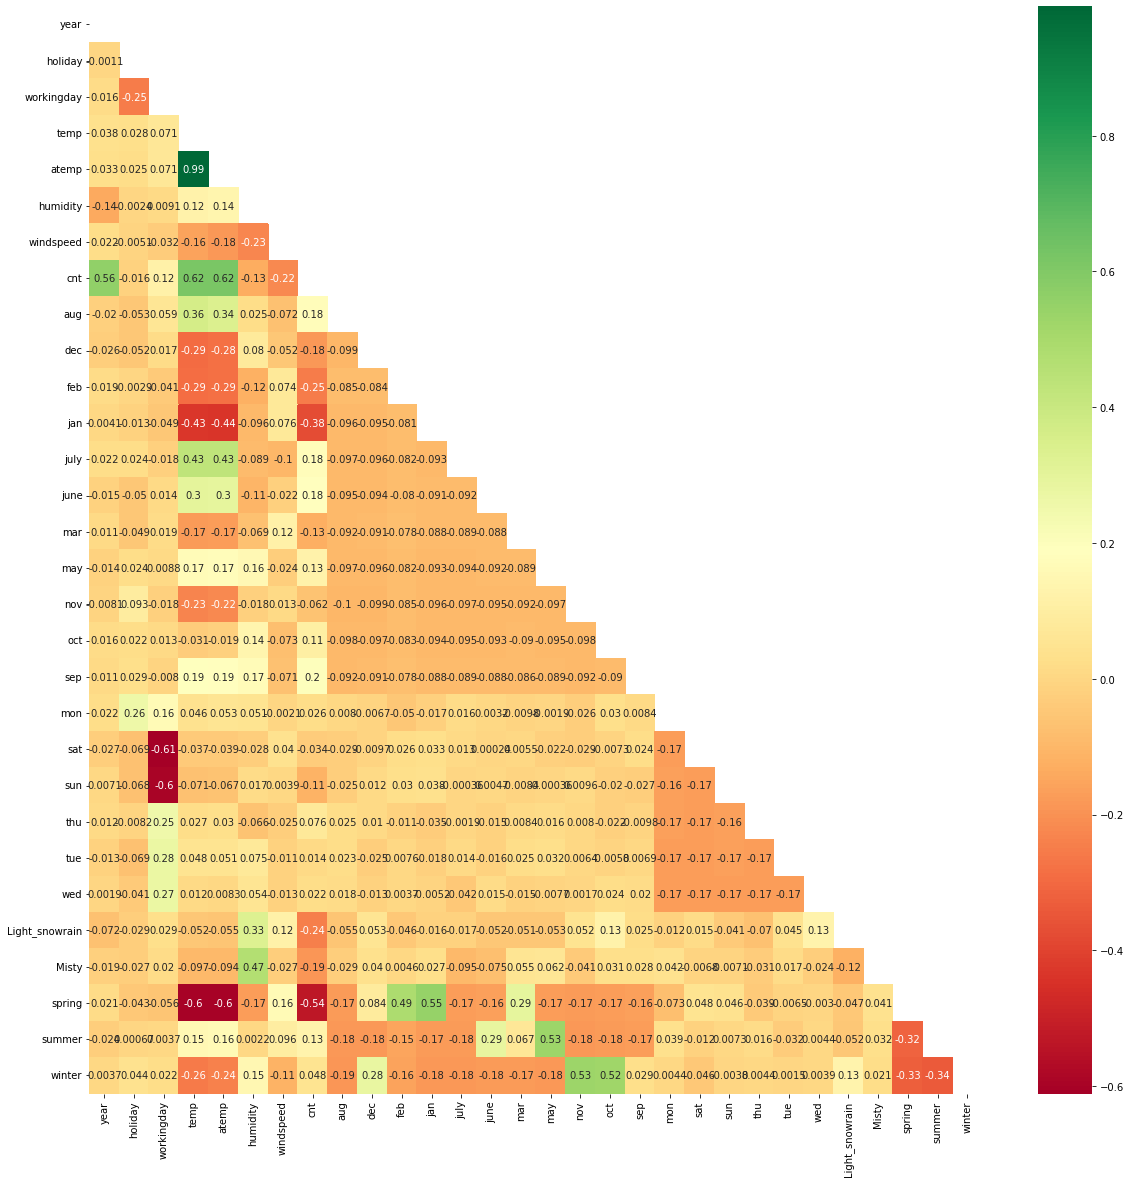

In [61]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20,20))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

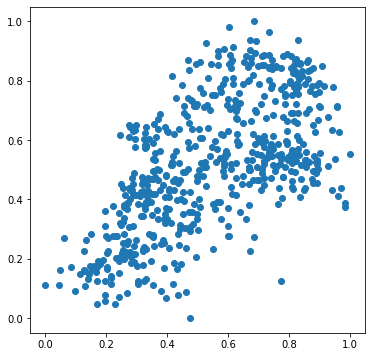

In [62]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [63]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [65]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
# Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [69]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 15),
 ('dec', False, 2),
 ('feb', False, 4),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 7),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', False, 5),
 ('mon', False, 12),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 13),
 ('wed', False, 9),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1)]

In [70]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Misty',
       'spring', 'winter'],
      dtype='object')


In [71]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'oct', 'sep', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [72]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [73]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [74]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,57.35
4,atemp,56.15
2,workingday,35.90
9,sat,8.23
10,sun,8.12
13,spring,2.64
1,holiday,2.49
14,winter,2.14
5,humidity,2.07
12,Misty,1.60


humidity shows high VIF value.

## Step 5: Building a linear model

In [75]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          6.10e-208
Time:                        17:50:59   Log-Likelihood:                 575.44
No. Observations:                 584   AIC:                            -1121.
Df Residuals:                     569   BIC:                            -1055.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2342      0.022     10.

In [76]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,57.28
4,atemp,55.64
2,workingday,26.97
8,sat,6.33
9,sun,6.04
12,spring,2.64
13,winter,2.10
1,holiday,2.09
7,nov,1.47
6,july,1.27


VIF values seems to be good now. But we will see if we can reduce further ?

In [77]:
# Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     205.1
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          4.81e-205
Time:                        17:51:08   Log-Likelihood:                 565.79
No. Observations:                 584   AIC:                            -1104.
Df Residuals:                     570   BIC:                            -1042.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1850      0.020      9.

In [78]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,57.23
4,atemp,55.63
2,workingday,26.49
7,sat,6.23
8,sun,5.94
11,spring,2.59
1,holiday,2.04
12,winter,1.83
6,july,1.26
5,windspeed,1.11


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [79]:
# Building 3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          9.94e-205
Time:                        17:51:18   Log-Likelihood:                 562.25
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     571   BIC:                            -1042.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1772      0.019      9.

In [83]:
# Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          9.94e-205
Time:                        17:51:51   Log-Likelihood:                 562.25
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     571   BIC:                            -1042.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1772      0.019      9.

In [85]:
# Building 5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          9.94e-205
Time:                        17:52:31   Log-Likelihood:                 562.25
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     571   BIC:                            -1042.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1772      0.019      9.

VIF value now seems to be good as it came below 5.

In [86]:
# Building 6th linear regression model
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          9.94e-205
Time:                        17:52:42   Log-Likelihood:                 562.25
No. Observations:                 584   AIC:                            -1099.
Df Residuals:                     571   BIC:                            -1042.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1772      0.019      9.

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [87]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.177169
year              0.233982
holiday          -0.000072
workingday        0.076451
temp              0.366601
atemp             0.099086
windspeed        -0.124682
july             -0.071325
sat               0.077961
sun               0.022828
Light_snowrain   -0.284582
Misty            -0.076080
spring           -0.119325
winter            0.049408
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [88]:
X_train_lm_6

,const,year,holiday,workingday,temp,atemp,windspeed,july,sat,sun,Light_snowrain,Misty,spring,winter
674,1.0,1,0,1,0.276252,0.265805,0.311545,0,0,0,0,0,0,1
495,1.0,1,0,1,0.590880,0.579874,0.442296,0,0,0,0,0,0,0
668,1.0,1,0,1,0.371783,0.370203,0.297431,0,0,0,0,1,0,1
308,1.0,0,0,0,0.333364,0.321313,0.343600,0,1,0,0,0,0,1
72,1.0,0,0,1,0.331557,0.332005,0.236118,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,0,0,0,0.278329,0.266626,0.338464,0,1,0,0,0,1,0
501,1.0,1,0,1,0.665643,0.647842,0.426913,0,0,0,0,0,0,0
638,1.0,1,0,1,0.575304,0.568280,0.141036,0,0,0,0,1,0,1
348,1.0,0,0,1,0.452776,0.437327,0.506421,0,0,0,0,1,0,1


In [89]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

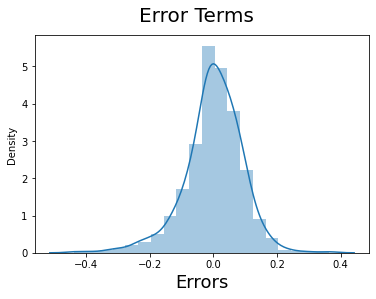

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [91]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,57.23
4,atemp,55.63
2,workingday,26.49
7,sat,6.23
8,sun,5.94
11,spring,2.59
1,holiday,2.04
12,winter,1.83
6,july,1.26
5,windspeed,1.11


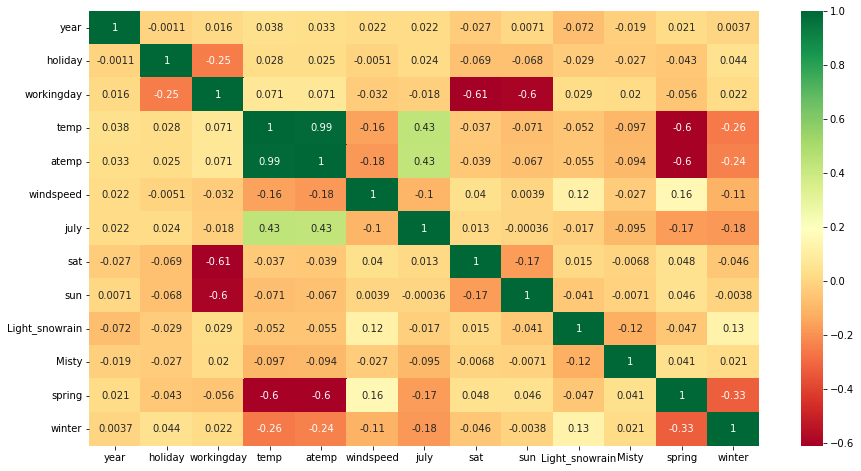

In [92]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity 

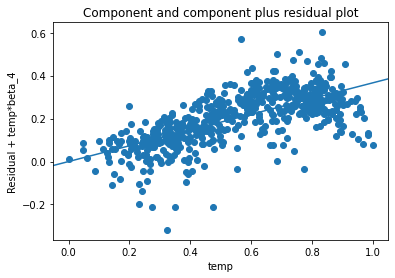

ValueError: ignored

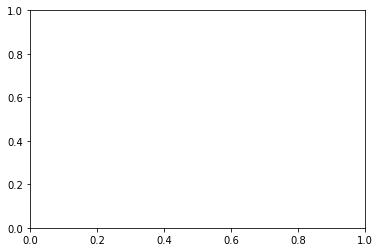

In [93]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

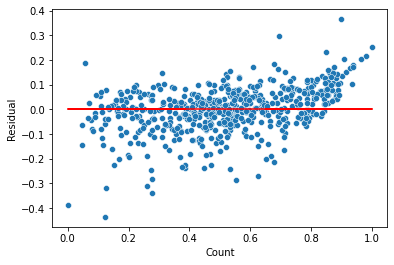

In [94]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [95]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
664,1,0,0,0.586727,0.572392,0.678173,0.439730,0.900828,0,0,...,1,0,0,0,0,0,1,0,0,1
655,1,0,1,0.577381,0.569100,0.688794,0.442296,0.861367,0,0,...,0,0,1,0,0,0,1,0,0,1
658,1,0,0,0.504695,0.495335,0.410515,0.296167,0.782559,0,0,...,0,1,0,0,0,0,0,0,0,1
148,0,0,0,0.758058,0.704203,0.804036,0.394883,0.548320,0,0,...,0,1,0,0,0,0,0,0,1,0
90,0,0,1,0.300135,0.268282,0.635157,0.487178,0.253682,0,0,...,0,0,0,0,0,0,1,0,1,0


In [96]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.486301,0.034247,0.671233,0.517145,0.492925,0.532507,0.353139,0.505193,0.061644,0.068493,...,0.136986,0.157534,0.143836,0.136986,0.109589,0.027397,0.383562,0.301370,0.267123,0.178082
std,0.501533,0.182488,0.471382,0.227325,0.212779,0.203085,0.155682,0.237567,0.241335,0.253460,...,0.345016,0.365558,0.352131,0.345016,0.313452,0.163800,0.487927,0.460433,0.443980,0.383899
min,0.000000,0.000000,0.000000,0.094267,0.061963,-0.239512,0.047450,0.069144,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.320124,0.313229,0.401354,0.245372,0.278244,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.515079,0.506930,0.519649,0.344002,0.504487,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.716445,0.667742,0.686670,0.448413,0.669064,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.933543,0.890635,0.958022,0.815378,0.959503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
y_test = df_test.pop('cnt')
X_test = df_test

In [98]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [99]:
y_pred = lr_6.predict(X_test_lm_6)

 **Model Predictions
, R-Squared value for train predictions**

In [100]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8422

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

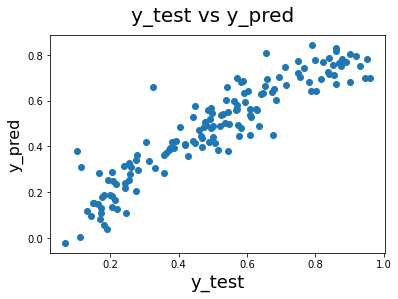

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [102]:
round(lr_6.params,4)

const             0.1772
year              0.2340
holiday          -0.0001
workingday        0.0765
temp              0.3666
atemp             0.0991
windspeed        -0.1247
july             -0.0713
sat               0.0780
sun               0.0228
Light_snowrain   -0.2846
Misty            -0.0761
spring           -0.1193
winter            0.0494
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


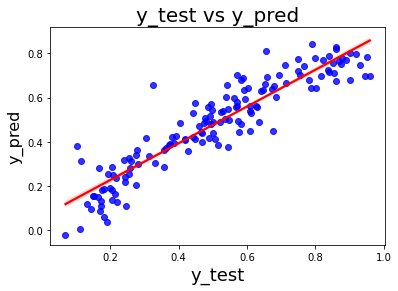

In [103]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.

Conclusion

Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year
- Sunday
- weathersit( Light Snow, Mist + Cloud